# Лабораторная №2. Однослойный перцептрон
Шкуратова Д.В. Группа-Б9122-01.03.02мкт

# Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Реализация функций активации

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_step(z):
    return (z >=0).astype(int)

def identity(z):
    return z 

def hyp_th(z):
    a = np.exp(z)
    b = np.exp(-z)
    return (a - b) / (a + b) 

def atan(z):
    return np.atan(z)

def neuron_output(X, w, b, activation=sigmoid):
    z = np.dot(X, w) + b
    return activation(z)

In [4]:
SIZE = 100
SEED = 45

In [5]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])
X = np.vstack((class_1, class_2))
y = np.array([0]*SIZE + [1]*SIZE)

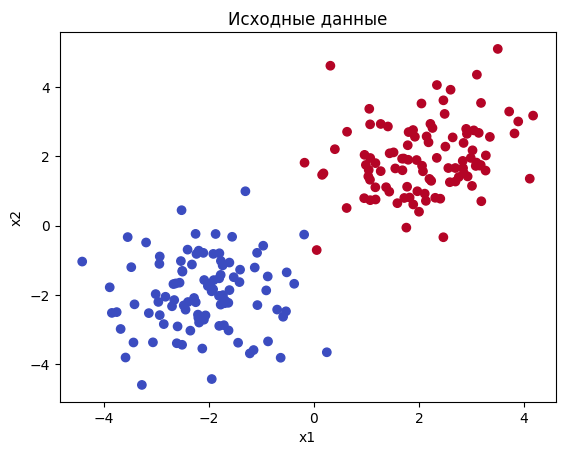

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title('Исходные данные')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
def plot_decision_boundary(w, b, activation=sigmoid):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b, activation)
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(f'Граница решений однослойного перцептрона\n функция активации:{activation.__name__}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


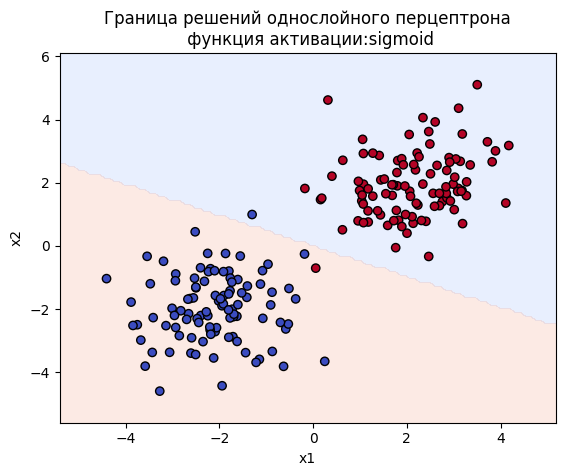

In [8]:
w = np.random.randn(2)
b = 0.0
plot_decision_boundary(w, b)

In [9]:
LEARNING_RATE = 0.1
EPOCHS = 10

## Проверка функций активации

Эпоха 1/10 — точность: 1.0000
Эпоха 2/10 — точность: 1.0000
Эпоха 3/10 — точность: 1.0000
Эпоха 4/10 — точность: 1.0000
Эпоха 5/10 — точность: 1.0000
Эпоха 6/10 — точность: 1.0000
Эпоха 7/10 — точность: 1.0000
Эпоха 8/10 — точность: 1.0000
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


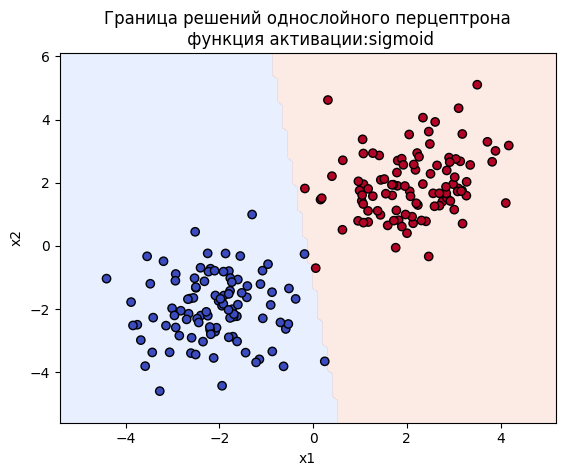

Эпоха 1/10 — точность: 0.9700
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9950
Эпоха 4/10 — точность: 0.9900
Эпоха 5/10 — точность: 0.9900
Эпоха 6/10 — точность: 0.9850
Эпоха 7/10 — точность: 0.9850
Эпоха 8/10 — точность: 0.9850
Эпоха 9/10 — точность: 0.9850
Эпоха 10/10 — точность: 0.9850


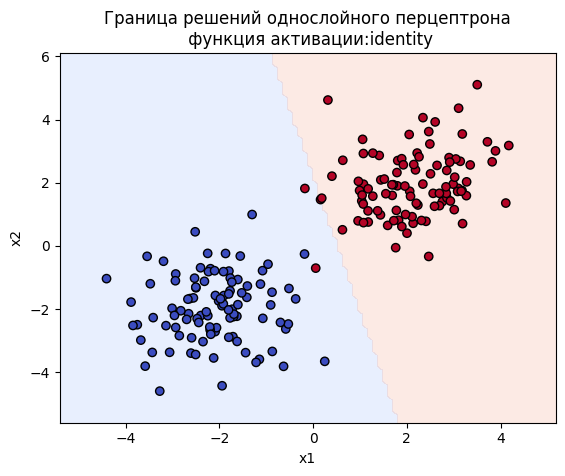

Эпоха 1/10 — точность: 0.9800
Эпоха 2/10 — точность: 0.9800
Эпоха 3/10 — точность: 0.9800
Эпоха 4/10 — точность: 0.9800
Эпоха 5/10 — точность: 0.9800
Эпоха 6/10 — точность: 0.9800
Эпоха 7/10 — точность: 0.9800
Эпоха 8/10 — точность: 0.9800
Эпоха 9/10 — точность: 0.9800
Эпоха 10/10 — точность: 0.9800


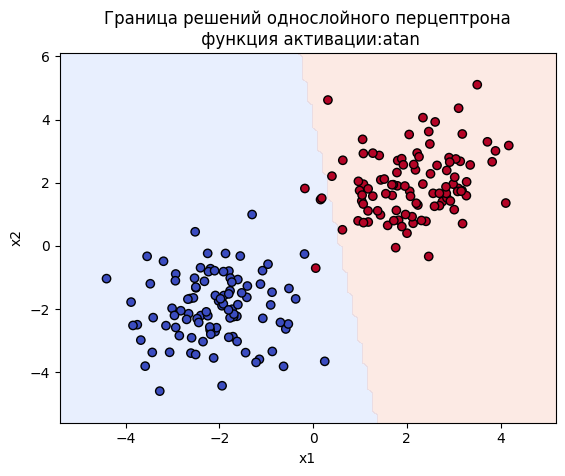

Эпоха 1/10 — точность: 0.9700
Эпоха 2/10 — точность: 0.9950
Эпоха 3/10 — точность: 0.9900
Эпоха 4/10 — точность: 0.9900
Эпоха 5/10 — точность: 0.9900
Эпоха 6/10 — точность: 0.9900
Эпоха 7/10 — точность: 0.9900
Эпоха 8/10 — точность: 0.9900
Эпоха 9/10 — точность: 0.9900
Эпоха 10/10 — точность: 0.9900


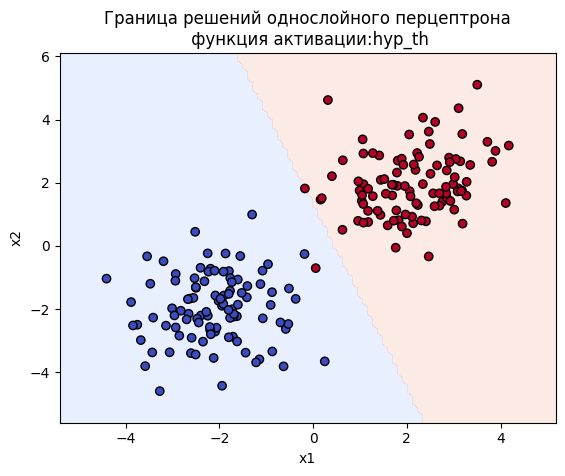

Эпоха 1/10 — точность: 1.0000
Эпоха 2/10 — точность: 1.0000
Эпоха 3/10 — точность: 1.0000
Эпоха 4/10 — точность: 1.0000
Эпоха 5/10 — точность: 1.0000
Эпоха 6/10 — точность: 1.0000
Эпоха 7/10 — точность: 1.0000
Эпоха 8/10 — точность: 1.0000
Эпоха 9/10 — точность: 1.0000
Эпоха 10/10 — точность: 1.0000


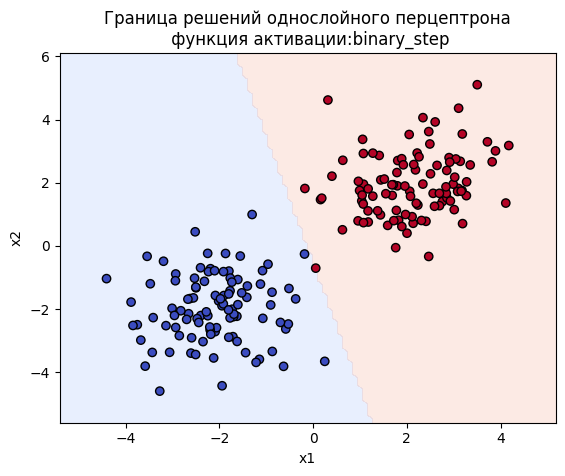

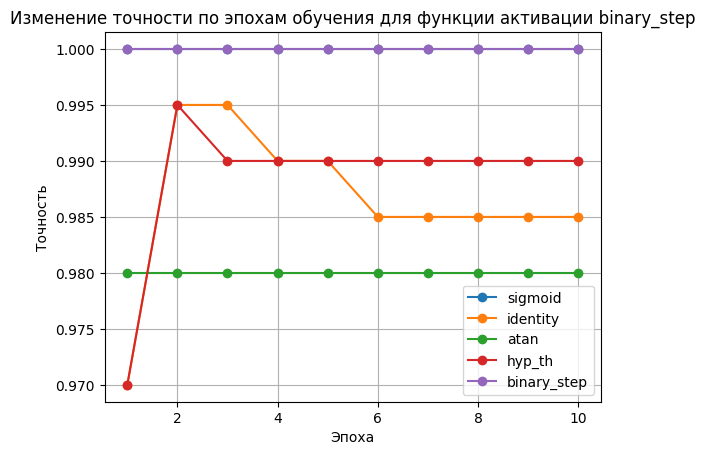

In [11]:
activation = [sigmoid, identity, atan, hyp_th, binary_step]
func_losses = {func.__name__ : [] for func in activation}
w_test = w
for func in activation:
    w = w_test
    b = 0.0
    losses = []

    for epoch in range(EPOCHS):
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = 1 if z >= 0 else 0
            error = y[i] - y_pred
            w += LEARNING_RATE * error * X[i]
            b += LEARNING_RATE * error
        output = np.dot(X, w) + b 

        preds = (func(output) > 0.5).astype(int)
        acc = (preds == y).mean()
        func_losses[func.__name__].append(1 - acc)
        print(f"Эпоха {epoch+1}/{EPOCHS} — точность: {acc:.4f}")
    plot_decision_boundary(w, b, activation=func)

for key, vals in func_losses.items():
    plt.plot(range(1, EPOCHS + 1), [1 - l for l in vals], marker='o', label=key)
    plt.title(f'Изменение точности по эпохам обучения для функции активации {func.__name__}')
plt.legend()
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True)
plt.show()




Получили разное значение точности в зависимости от выбора функции активации, для каких-то она даже упала с увеличениемп эпохи: th, identity, для atan и binary_step не изменялась после 1-й эпохи

На точность также влияет выбор порогового значения


## Ответы на вопросы

1. Что делает функция активации в искусственном нейроне. Чем отличается искусственный нейрон от однослойного перцептрона?
- Функция активации позволяет добавить нелинейность между слоями, чтобы изучать более сложные зависимости. 
- Искусственный нейрон - математическая модель нейрона, состоит из сумматора, аггрегирующего сигналы: $\sum_i w_i x_i$, где $w_i$ - веса, $x_i$ - входные сигналы, и функции активации, обрабатывающей полученную взвешенную сумму. 
Однослойный перцептрон - сеть, в которой сигналы от входного слоя сразу подаются на выходной слой, который и преобразует сигнал и сразу же выдает ответ. Состоит из нескольких нейронов

2. Какое правило используется для обучения перцептрона?
- Обучение перцептрона происходит на основе градиентного спуска: задача найти такие вecа $w$, чтобы выходная ошибка была минимальной
- Формула обновления весов 
$ w = w + \eta  (y_{true} - y_{pred})x, $
где 
  - $w$ — веса
  - $b$ — смещение (bias)
  - $f$ — функция активации
3. Почему однослойный перцептрон не может решить задачу XOR?
- Однослойный перцептрон решает задачу классификации для линейно разделимых данных, задача XOR предполагает наличие двух гиперплоскостей для разделения классов
4. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?
- Область значений ReLU: $[0, +\infty]$, получим что выход нейронов не ограничен, могут быть проблемы с выбором порогового значения для однослойного перцептрона. Также все отрицательные выходные значения будут принимать значение 0, что может привести к "умиранию" нейронов.
